In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
from shapely.affinity import translate
from shapely.ops import unary_union
from shapely import intersection
from pathlib import Path
import numpy as np

In [4]:
import warnings
warnings.filterwarnings('ignore') 

In [5]:
DATA_FOLDER = Path("../data")

saint_denis_path = DATA_FOLDER / "saint_denis_reference_data.gpkg"

ecoles = gpd.read_file(saint_denis_path, layer="bdtopo_education").to_crs(2154)
batiments = gpd.read_file(saint_denis_path, layer="bdtopo_batiment").to_crs(2154)

In [55]:
from potentiel_solaire.features.roof_attributes import  recuperation_mnh, recuperation_mns

In [29]:
batiments

,cleabs_left__bat,nature__bat,usage_1,usage_2,construction_legere,etat_de_l_objet__bat,date_creation_left__bat,date_modification_left__bat,date_d_apparition_left__bat,date_de_confirmation_left__bat,...,chef_lieu_de_departement__zone,chef_lieu_de_region__zone,capitale_d_etat__zone,date_du_recensement__zone,organisme_recenseur__zone,codes_siren_des_epci__zone,lien_vers_chef_lieu__zone,liens_vers_autorite_administrative__zone,code_siren__zone,geometry
0,BATIMENT0000000243398338,"Industriel, agricole ou commercial",Indifférencié,None,False,En service,2010-09-06 11:49:18.967,2021-08-19 11:30:11.625,None,NaT,...,False,False,False,2021-01-01,INSEE,200054781/200057867,PAIHABIT0000000002597636,SURFACTI0000000002556769,219300662,"MULTIPOLYGON Z (((652805 6867870.5 45, 652807...."
1,BATIMENT0000000243403398,Indifférenciée,Commercial et services,None,False,En service,2010-09-06 11:54:41.948,2019-01-09 13:08:55.077,None,NaT,...,False,False,False,2021-01-01,INSEE,200054781/200057867,PAIHABIT0000000002597636,SURFACTI0000000002556769,219300662,"MULTIPOLYGON Z (((653093.9 6867756.5 44.2, 653..."
2,BATIMENT0000000243403396,Indifférenciée,Résidentiel,None,False,En service,2010-09-06 11:54:41.948,2019-03-15 19:18:06.773,None,NaT,...,False,False,False,2021-01-01,INSEE,200054781/200057867,PAIHABIT0000000002597636,SURFACTI0000000002556769,219300662,"MULTIPOLYGON Z (((653103.9 6867742.6 43.8, 653..."
3,BATIMENT0000000243403399,Indifférenciée,Commercial et services,None,True,En service,2010-09-06 11:54:41.948,2022-07-30 23:16:38.938,None,NaT,...,False,False,False,2021-01-01,INSEE,200054781/200057867,PAIHABIT0000000002597636,SURFACTI0000000002556769,219300662,"MULTIPOLYGON Z (((653121.8 6867780.4 -1000, 65..."
4,BATIMENT0000000243403625,Indifférenciée,Commercial et services,None,False,En service,2010-09-06 11:54:41.948,2022-07-30 23:16:38.938,None,NaT,...,False,False,False,2021-01-01,INSEE,200054781/200057867,PAIHABIT0000000002597636,SURFACTI0000000002556769,219300662,"MULTIPOLYGON Z (((653174.1 6867744.8 -1000, 65..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,BATIMENT0000000243401748,Indifférenciée,Commercial et services,Résidentiel,False,En service,2010-09-06 11:52:54.720,2019-03-15 15:47:12.549,1800/01/01,NaT,...,False,False,False,2021-01-01,INSEE,200054781/200057867,PAIHABIT0000000002597636,SURFACTI0000000002556769,219300662,"MULTIPOLYGON Z (((652971.1 6870642.3 40, 65296..."
433,BATIMENT0000000243404822,Indifférenciée,Commercial et services,None,True,En service,2010-09-06 11:56:36.675,2022-07-30 23:16:38.938,None,NaT,...,False,False,False,2021-01-01,INSEE,200054781/200057867,PAIHABIT0000000002597636,SURFACTI0000000002556769,219300662,"MULTIPOLYGON Z (((653011.2 6870599.4 -1000, 65..."
434,BATIMENT0000000243404823,Indifférenciée,Commercial et services,None,True,En service,2010-09-06 11:56:36.675,2022-07-30 23:16:38.938,None,NaT,...,False,False,False,2021-01-01,INSEE,200054781/200057867,PAIHABIT0000000002597636,SURFACTI0000000002556769,219300662,"MULTIPOLYGON Z (((653026 6870572.9 -1000, 6530..."
435,BATIMENT0000000243404824,Indifférenciée,Commercial et services,None,True,En service,2010-09-06 11:56:36.675,2022-07-30 23:16:38.938,None,NaT,...,False,False,False,2021-01-01,INSEE,200054781/200057867,PAIHABIT0000000002597636,SURFACTI0000000002556769,219300662,"MULTIPOLYGON Z (((653018.3 6870536.4 -1000, 65..."


In [20]:
ecole_cible = ecoles.iloc[[6]]  # On prend la 6ème école par exemple
ecole_cible = ecole_cible.to_crs(2154)
# On va examiner dans un rayon de 100m
ecole_cible['geometry'] = ecole_cible.geometry.buffer(60)
ecole_cible

,cleabs_left,categorie,nature,nature_detaillee,toponyme,statut_du_toponyme,importance,fictif,etat_de_l_objet,date_creation_left,...,chef_lieu_de_departement,chef_lieu_de_region,capitale_d_etat,date_du_recensement,organisme_recenseur,codes_siren_des_epci,lien_vers_chef_lieu,liens_vers_autorite_administrative,code_siren,geometry
6,SURFACTI0000000244242426,Science et enseignement,Structure d'accueil pour personnes handicapées,Institut médico-éducatif,I.M.E. les Moulins Gémeaux,Collecté,5,False,En service,2010-10-07 14:58:24.164,...,False,False,False,2021-01-01,INSEE,200054781/200057867,PAIHABIT0000000002597636,SURFACTI0000000002556769,219300662,"POLYGON ((652212.871 6871608.654, 652236.571 6..."


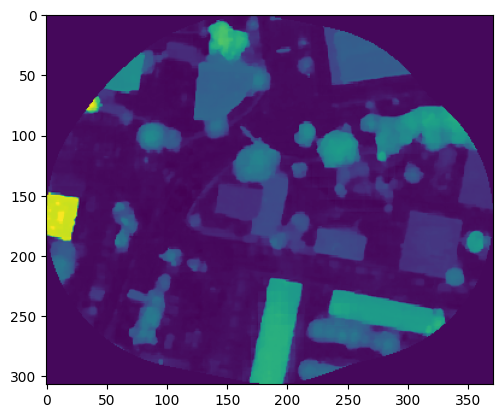

In [56]:
h = recuperation_mns(ecole_cible, cache=True)[0] 
H = recuperation_mnh(ecole_cible, cache=True)[0] 
plt.imshow(H)

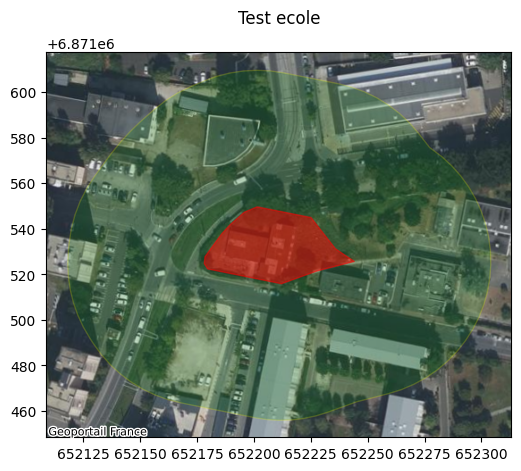

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

ecole_cible.plot(ax=ax, alpha=0.2, color ="green", edgecolor='yellow')
ecoles.iloc[[6]] .plot(ax=ax, alpha=0.5, color ="red", edgecolor='red')

ax.set_title("Test ecole\n") 
cx.add_basemap(ax, crs=ecole_cible.crs, source=cx.providers.GeoportailFrance.orthos )
fig.show()

Angles in degrees 12.676480462360383 8.0710209009199


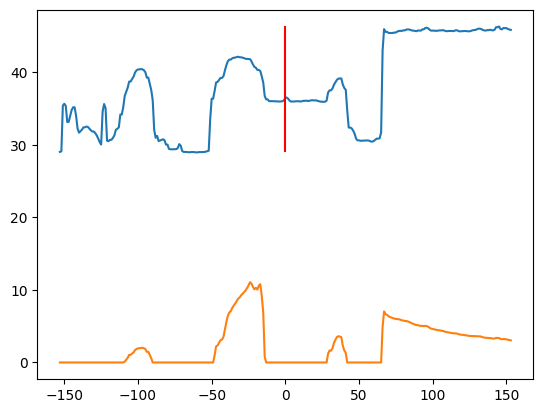

In [110]:
# NORD SUD
EW = np.max(h[:,h.shape[1]//2-10:h.shape[1]//2+10],axis=1)
d = np.array(range(len(EW))) - len(EW)//2
angle_ew = (EW - EW[len(EW)//2]) / np.abs(d) 
angle_ew[np.abs(d) < 10 ] = 0
angle_ew[angle_ew < 0] = 0
W = np.max(angle_ew[len(EW)//2:])*57.2958
E = np.max(angle_ew[:len(EW)//2])*57.2958
plt.plot( d, EW  )
plt.plot( d, angle_ew*50  )
plt.vlines( 0,ymin=min(EW),ymax=max(EW), color= "red")
print("Angles in degrees",E,W)

Angles in degrees 7.446927501145849 0.14676900961924408


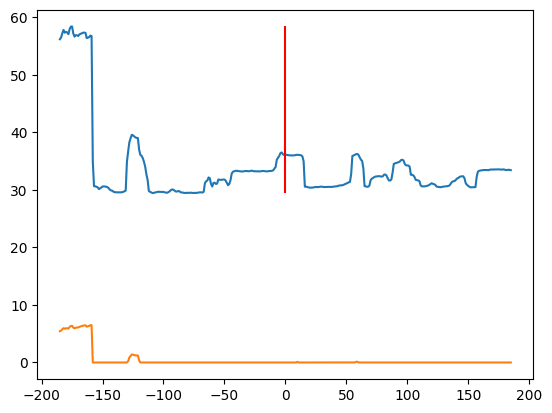

In [111]:
# EST OUEST 
EW =  np.max(h[h.shape[0]//2-10:h.shape[0]//2+10],axis=0) 
d = np.array(range(len(EW))) - len(EW)//2
# Angle comme hauteur/distance
angle_ew = (EW - EW[len(EW)//2]) / np.abs(d) 
angle_ew[np.abs(d) < 10 ] = 0
angle_ew[angle_ew < 0] = 0
W = np.max(angle_ew[len(EW)//2:])*57.2958
E = np.max(angle_ew[:len(EW)//2])*57.2958
plt.plot( d, EW  )
plt.plot( d, angle_ew*50  )
plt.vlines( 0,ymin=min(EW),ymax=max(EW), color= "red")
print("Angles in degrees",E,W)

# Pour les angles NW.NE.... on pivote l'image de 45°

In [94]:
from scipy.ndimage import rotate

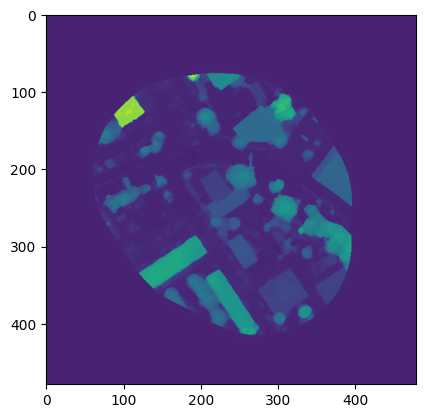

In [99]:
Hbis = rotate(H, angle=-45,reshape=True)
hbis = rotate(h, angle=-45,reshape=True)
plt.imshow(Hbis)

Angles in degrees 14.002606359234978 5.512212374729786


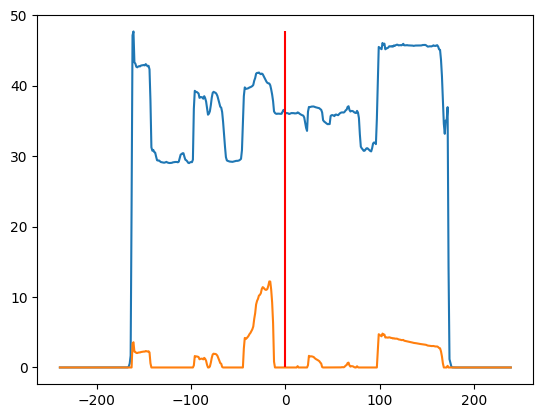

In [112]:
# NORDOUEST / SUDEST 
EW = np.max(hbis[:,hbis.shape[0]//2-10:hbis.shape[0]//2+10],axis=1)
d = np.array(range(len(EW))) - len(EW)//2
angle_ew = (EW - EW[len(EW)//2]) / np.abs(d) 
angle_ew[np.abs(d) < 10 ] = 0
angle_ew[angle_ew < 0] = 0
W = np.max(angle_ew[len(EW)//2:])*57.2958
E = np.max(angle_ew[:len(EW)//2])*57.2958
plt.plot( d, EW  )
plt.plot( d, angle_ew*50  )
plt.vlines( 0,ymin=min(EW),ymax=max(EW), color= "red")
print("Angles in degrees",E,W)

Angles in degrees 2.2931154974656947 6.791505406951904


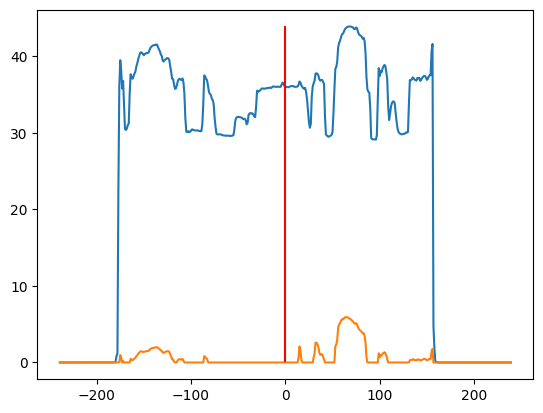

In [ ]:
# NORDEST / SUDOUEST
EW =  np.max(hbis[hbis.shape[0]//2-10:hbis.shape[0]//2+10],axis=0) 
d = np.array(range(len(EW))) - len(EW)//2
# Angle comme hauteur/distance
angle_ew = (EW - EW[len(EW)//2]) / np.abs(d) 
angle_ew[np.abs(d) < 10 ] = 0
angle_ew[angle_ew < 0] = 0
W = np.max(angle_ew[len(EW)//2:])*57.2958
E = np.max(angle_ew[:len(EW)//2])*57.2958
plt.plot( d, EW  )
plt.plot( d, angle_ew*50  )
plt.vlines( 0,ymin=min(EW),ymax=max(EW), color= "red")
print("Angles in degrees",E,W)